In [1]:
#meta 1/25/2021 Poker my Model Knn 
#Previously in example 1, the author compared Keras NN with LogR, CART and SVM. Here, I try kNN modeling.
#setup like Example 1 with with transformed dataset from Kaggle (800K records x 54 features)
#src https://medium.com/@virgoady7/poker-hand-prediction-7a801e254acd
#based on tryPoker_example1.ipynb

#history
#based on tryPoker_example1.ipynb
#      Trainset 25,010 records, testset 1mil records

#here 1/27/202 TRY KNN MODELING - SWITCH TO TRANSFORMED KAGGLE DS
#      Kaggle ds, transformed into numpy matrix 800K x 54
#      Try diff values of k = [3,7]


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
import time #to track performance time
import warnings
warnings.filterwarnings('ignore')

#modeling
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

#modeling help
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import load, dump

# Poker Example with Keras
Previously in example 1, the author compared Keras NN with LogR, CART and SVM.  Here, I try kNN modeling.

## 0. Load Data

In [3]:
poker = load('data/my_poker_tidy.pkl')
poker.shape

(800000, 53)

In [4]:
poker['class'].cat.categories

Index(['Nothing', 'One pair', 'Two pairs', 'Three of a kind', 'Straight',
       'Flush', 'Full house', 'Four of a kind', 'Straight flush',
       'Royal flush'],
      dtype='object')

## 1. Prep Data
X & y

In [5]:
X = poker.iloc[:,:-1]
y = poker['class'].cat.codes

In [6]:
# Randomly split data into two groups: a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=24)

print ("\nTotal records in learning set: {}".format(poker.shape[0]))
print ("Total records in training set: {}".format(len(X_train)))
print ("Total records in test set: {}".format(len(X_test)))
    
#notice index after reshuffling
X_train.tail()


Total records in learning set: 800000
Total records in training set: 720000
Total records in test set: 80000


,ace_clubs,ace_diamonds,ace_hearts,ace_spades,eight_clubs,eight_diamonds,eight_hearts,eight_spades,five_clubs,five_diamonds,...,ten_hearts,ten_spades,three_clubs,three_diamonds,three_hearts,three_spades,two_clubs,two_diamonds,two_hearts,two_spades
478609,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
516439,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
211136,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
899,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
242082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [7]:
y_train.shape, y_test.shape

((720000,), (80000,))

0    360320
1    304522
2     34374
3     15325
4      2798
5      1456
6      1034
7       160
8         9
9         2
dtype: int64


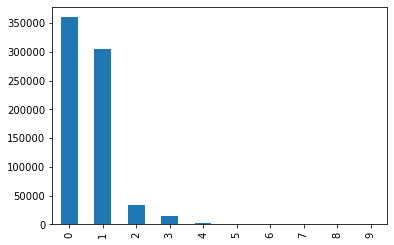

In [8]:
#visualize distribution trainset vs testset
print(y_train.value_counts().sort_index())
y_train.value_counts().sort_index().plot(kind='bar');

0    40253
1    33647
2     3799
3     1663
4      328
5      164
6      116
7       29
8        1
dtype: int64


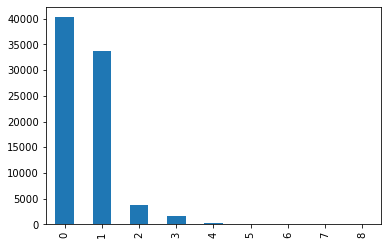

In [10]:
#visualize distribution trainset vs testset -> only 9 classes out of 10
print(y_test.value_counts().sort_index())
y_test.value_counts().sort_index().plot(kind='bar');

##### ## 2. Model  

### kNN
try diff values of k = [3,5]

In [ ]:
#track time
t0 = time.time()

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print ("Training time (in min)", (time.time() - t0)/60)

#predict
y_hat=clf.predict(X_test)
print ("+ Testing time (in min)", (time.time() - t0)/60)

accuracy_score(y_hat,y_test)

In [ ]:
unique, counts = np.unique(y_hat, return_counts=True)
print (np.asarray((unique, counts)).T)

In [ ]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion matrix:\n{}".format(cm))

In [ ]:
#track time
t0 = time.time()

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print ("Training time (in min)", (time.time() - t0)/60)

#predict
y_hat=clf.predict(X_test)
print ("+ Testing time (in min)", (time.time() - t0)/60)

accuracy_score(y_hat,y_test)

In [ ]:
unique, counts = np.unique(y_hat, return_counts=True)
print (np.asarray((unique, counts)).T)

In [ ]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion matrix:\n{}".format(cm))

kNN models trained on transformed Kaggle dataset (800K records in learning set) perform at 74%+ accuracy, which is a great improvement over models trained on non-transformed data.

##### Summary
Same data represented differently made a simple algorithm way more accurate than a DL model with non-transformed data.  So it really matters how you feed the data to ML. 

In [ ]:
mystop

In [ ]:
#track time
t0 = time.time()

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)

print ("Training time (in min)", (time.time() - t0)/60)

#predict
y_hat=clf.predict(x_test)
print ("+ Testing time (in min)", (time.time() - t0)/60)

accuracy_score(y_hat,y_test)

In [ ]:
unique, counts = np.unique(y_hat, return_counts=True)
print (np.asarray((unique, counts)).T)

In [ ]:
cm = confusion_matrix(y_test, y_hat)
print("Confusion matrix:\n{}".format(cm))

In [ ]:
mystop

Slightly better results with higher value of k -> finetune hyperparam k.  Test time increases slightly with k.

In [ ]:
mystop

## Xtra

In [ ]:
import scipy.sparse
mat = scipy.sparse.eye(3)
pd.DataFrame.sparse.from_spmatrix(mat)
